In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Memuat Dataset**

In [7]:
df = pd.read_csv("data.csv")

print("🔹 Data Awal:")
display(df.head())

print("\n🔹 Info Dataset:")
print(df.info())

🔹 Data Awal:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



🔹 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

# **Pra-pemrosesan Data**

In [8]:
# Hapus kolom kosong atau tidak relevan
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Cek nilai kosong
print("\n🔹 Jumlah Missing Value Setelah Dihapus:")
print(df.isnull().sum())

# Ganti label diagnosis: M = malignant (1), B = benign (0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Pisahkan fitur dan target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


🔹 Jumlah Missing Value Setelah Dihapus:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# **Split Data (Train/Test)**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# **Model Klasifikasi**

In [10]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


# **Evaluasi Model**

In [11]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n===== 🔹 {name} =====")
    print(f"Akurasi: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


===== 🔹 Naive Bayes =====
Akurasi: 0.9211
Confusion Matrix:
[[69  3]
 [ 6 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114


===== 🔹 Random Forest =====
Akurasi: 0.9737
Confusion Matrix:
[[72  0]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


===== 🔹 Decision Tree =====
Akurasi: 0.9298
Confusion Matrix:
[[68  4]
 [ 4 38]]

Classification Report:
              precision    rec

# **Visualisasi Perbandingan Akurasi**

/tmp/ipython-input-21256726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")


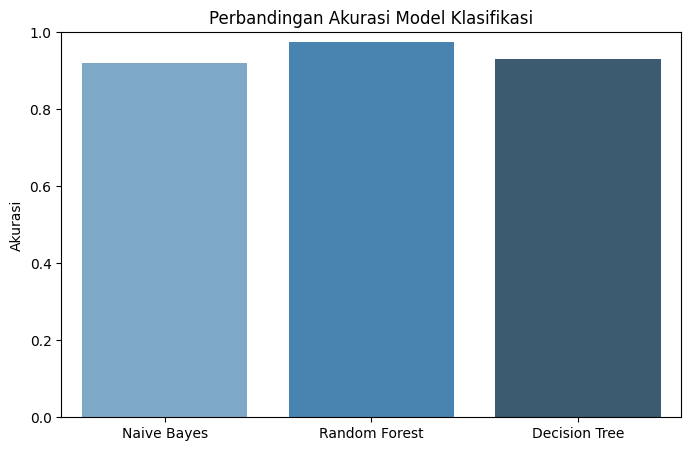

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Blues_d")
plt.title("Perbandingan Akurasi Model Klasifikasi")
plt.ylabel("Akurasi")
plt.ylim(0,1)
plt.show()


# **Visualisasi Pohon Keputusan (Decision Tree)**

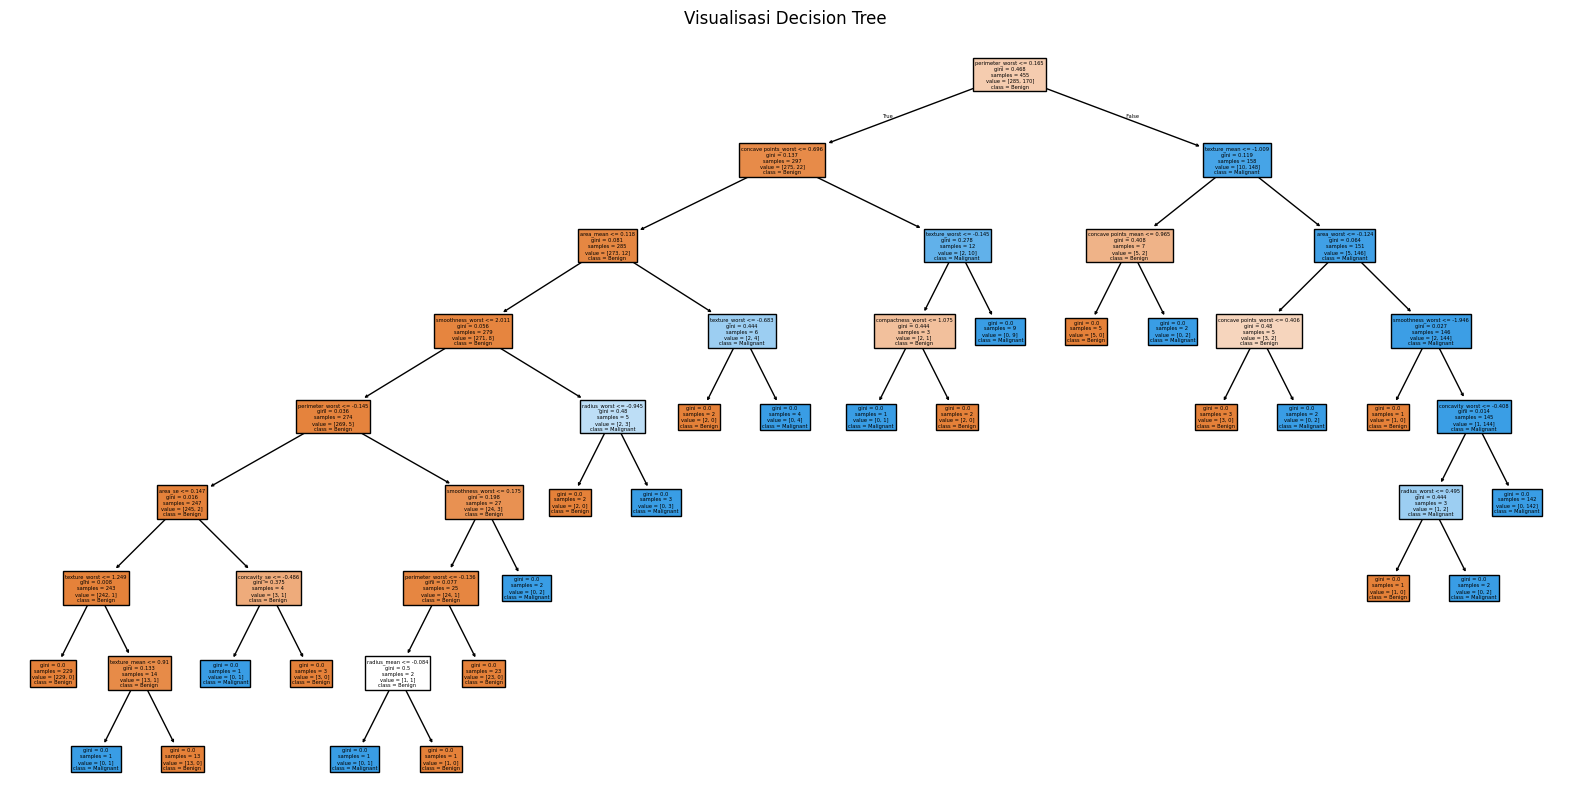

In [13]:
plt.figure(figsize=(20,10))
plot_tree(
    models["Decision Tree"],
    filled=True,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"]
)
plt.title("Visualisasi Decision Tree")
plt.show()

# **Cross Validation**

In [14]:
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"\n{name} - Rata-rata Akurasi Cross Validation: {scores.mean():.4f} (+/- {scores.std():.4f})")


Naive Bayes - Rata-rata Akurasi Cross Validation: 0.9279 (+/- 0.0204)

Random Forest - Rata-rata Akurasi Cross Validation: 0.9543 (+/- 0.0217)

Decision Tree - Rata-rata Akurasi Cross Validation: 0.9173 (+/- 0.0242)


# **Menentukan Model Terbaik**

In [15]:
best_model = max(results, key=results.get)
print("\nModel Terbaik Berdasarkan Akurasi:", best_model)


Model Terbaik Berdasarkan Akurasi: Random Forest
